# Supervised Learning: Regression Project 2 - Cars4U
### Paige Singleton
### June 2022
## Section 1: Understanding the DataSet (Overview) - EDA

### Problem Definition
- Given data containing the "different attributes of used cars sold in different locations," 
    - derive insights from the data 
    - predict the prices of used cars (linear Regression model)
    - communicate recommendations that will help the business

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Removes the limit from the number of displayed columns and rows. ((code from video lecture FIFA notebook: video lecture)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
#Read csv file
cars=pd.read_csv('used_cars_data.csv')
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [3]:
# Display 10 random rows

np.random.seed(1)
cars.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


In [4]:
#Understand tha overall dataset structure and data types
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [5]:
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns.')  # (code from video lecture FIFA notebook: video lecture)


There are 7253 rows and 14 columns.


### Initial Observations
- S. No.: (Seriel Number) appears to have no null values; it is an integer; Seriel number appears to match the row index number
- Name: (Name of car) appears to be categorical yet current data type is object; contains 2 pieces of information (brand name and model name); appears to have no missing values; consider splitting the data and categorizing
- Location: (where the car is being sold) appears to have no missing values; iiss a object type that posibly should change to category
- Year: (Manufacturing year of car) appears to have no missing values; data type is integer
- Kilometers_driven: (total distance drive in kilometers): data type is integer; appears to contain no missing values
- Fuel_Type: (has the following categories (according to problem statement) Petrol, Diesel, electric, CNG, LPG; appears to contain no missing values; currently dtype object - consider changintto categorical
- Transmission: (either Automatic or Manual) - currently object dtype - consider changing to categorical; appears to contain no missing values
- Owner_Type: Appears to be a cardinal value perhaps representing number of previous owners;  appears to contain no missing values; currently an object dtype that might need to be a category
- Millege: (Standard manufacturer declared mileage in km/kg) appears to contain 2 missing values which willneed to imputed or dropped;currently object dtype with units; units will likely be dropped and dtype converted to float
- Engine: (displacement volume of the engine in CC); currently an object dtype containing the units; likely need to drop the units and change the dtype to float; currently contains few missing values
- Power: (max power of he engine in bhp) currently an object dtype containing the units;likely need to drop the units and change the dtype to float; currently contains many missing values
- Seats: (number of seats in car) is currently a float dtype (which might be changes to category); contains few missing 
- New_Price: (price of new car/same model in INR Lakhs); apppears to contain no missing values and has dtype of float64 which is appropriate for data; 
- Price: (Price of the used car in INR Lakhs): target variable; dtype is float64 which is appropriate; appears to contain many missing values whose corresponding rows will need to be dropped


In [6]:
#Verify the number of missing values in each column of dataset
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [7]:
# Understand the number of unique values in each column
cars.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 385
Seats                   9
New_Price             643
Price                1373
dtype: int64

### Observations
- Sum of missing value counts as expected in initial observations
- the following columns might be considered categorical: Location, Fuel_Type, Transmission, Owner_type, Seats

In [8]:
#Understand the number of each type for the following columns: Location, Fuel_Type, Transmission, Owner_type, Seats
cat_cols = ['Location','Fuel_Type','Transmission','Owner_Type','Seats']

for col in cat_cols:
    print(cars[col].value_counts())
    print("_________________________________")



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
_________________________________
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
_________________________________
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
_________________________________
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
_________________________________
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
_________________________________


In [16]:
#Understand the percentage of each type for the following columns: Location, Fuel_Type, Transmission, Owner_type, Seats

for col in cat_cols:
    x = cars[col].value_counts(normalize=True)
    print(x*100)
    print("_________________________________")


Mumbai        13.084241
Hyderabad     12.077761
Coimbatore    10.643872
Kochi         10.643872
Pune          10.547360
Delhi          9.099683
Kolkata        9.016958
Chennai        8.148352
Jaipur         6.879912
Bangalore      6.066455
Ahmedabad      3.791535
Name: Location, dtype: float64
_________________________________
Diesel      53.109058
Petrol      45.843099
CNG          0.854819
LPG          0.165449
Electric     0.027575
Name: Fuel_Type, dtype: float64
_________________________________
Manual       71.749621
Automatic    28.250379
Name: Transmission, dtype: float64
_________________________________
First             82.062595
Second            15.883083
Third              1.888874
Fourth & Above     0.165449
Name: Owner_Type, dtype: float64
_________________________________
5.0     83.986111
7.0     11.055556
8.0      2.361111
4.0      1.652778
6.0      0.527778
2.0      0.250000
10.0     0.111111
9.0      0.041667
0.0      0.013889
Name: Seats, dtype: float64
___________

In [10]:
#Obtain a statistical summary of ALL the data (Transpose the output set)
cars.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Obtain a statistical summary of numerical dtypes (Transpose the output set)
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


### Initial Univariate analysis of 6 numerical type (prior to data preprocessing)

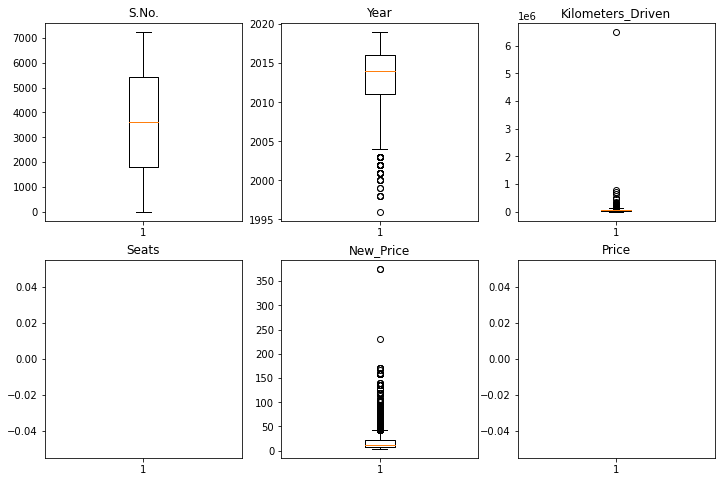

In [12]:
#Create boxplots for numerical variables which display utlaiers outside +-1.5*IQR
#NOTE: The technique is same as that presented in content video on Outliers
num_cols = ['S.No.','Year','Kilometers_Driven','Seats','New_Price','Price']
plt.figure(figsize = (12,8))

for i, variable in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.boxplot(cars[variable],whis=1.5)
    plt.tight_layout
    plt.title(variable)
    
plt.show()

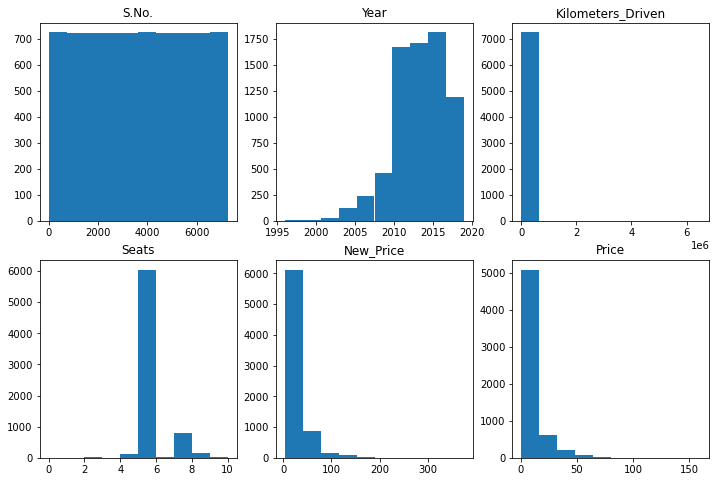

In [13]:
#Create histplots for numerical variables which display utlaiers outside +-1.5*IQR
#NOTE: The technique is same as that presented in content video on Outliers
plt.figure(figsize = (12,8))

for i, variable in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    plt.hist(cars[variable])
    plt.tight_layout
    plt.title(variable)
    
plt.show()

### Observations
- S.No: is a series of numbers 1 to 7253 on a scale of 1. This value will likely be uniformative for the model.
- Year: 50% of the values of Year are integers between 2014 and 2019, inclusively. The data is heavily skewed left with many outliers betweeen 1995 and 2005.
- Kilometers_Drive: Has a max value of 6,500,000. This value is suspect based on domain knowledge of the maximum number of miles that a car can be drive in its lifetime. This value is also an outlier. Likely this value needs to be dropped.
- Seats - Seats appears to be a categorical variable with a mode of 5 (Q1=Median=Q3 = 5);

C:\Users\paige\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6699: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


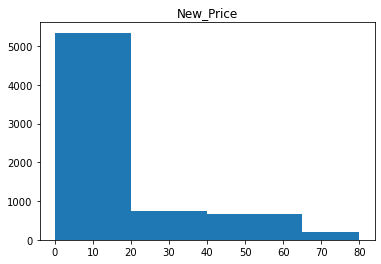

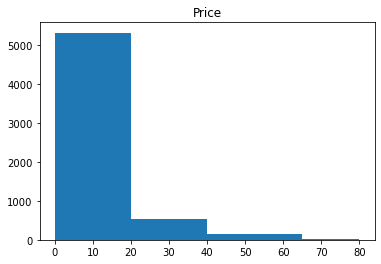

In [14]:
cols_to_bin = ['New_Price', 'Price']
binned_price = [0, 20, 40, 65, 80, np.inf]
for colname in cols_to_bin:
    plt.hist(cars[colname], bins=binned_price)
    plt.title(colname)
    plt.show()

## Bivariate Analysis prior to preprocessing

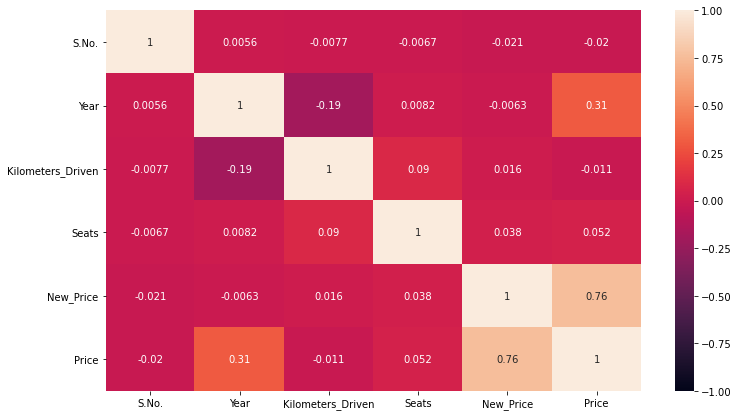

In [15]:
#Corelation Matrix
plt.figure(figsize=(12,7))
sns.heatmap(cars.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

### Observations 
- Price is positively correlated to Year (0.31)
- New Price is strongly positively correlated to Old Price (0.76)

## Categorical type versus New Price Bivariate Analysis (prior to preprocessing)

In [20]:
cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

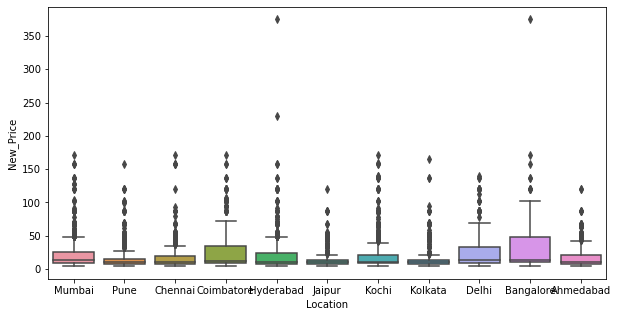

In [22]:
#Locaton Vs New_Price
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="New_Price", data=cars)
plt.show()

### Observations
- Location and Price appear to be related
- Some locations, such as Bangladore and Coimbatore appear to have higher "New_Price" variables
- Several other locations such as Pune and Kolkata have lower associate "New_Price"

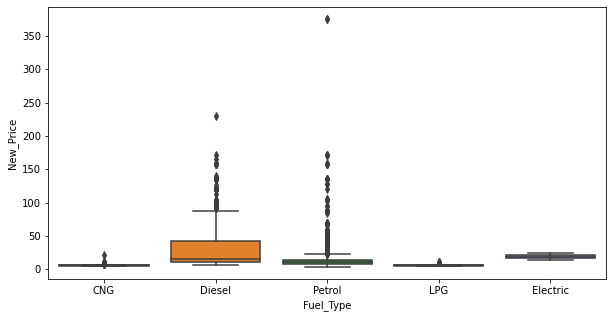

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="New_Price", data=cars)
plt.show()
plt.show()

### Observations
- From previous observations, CNG, LPG and Electric each account for less than 1% of Cars
- Diesal Cars account for 53% of Cars and are clearly priced more than Petrol cars, which account for 46% of cars

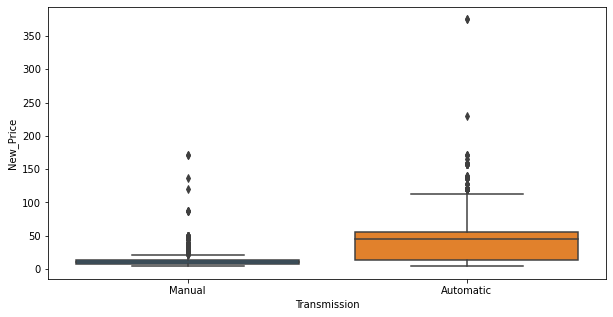

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="New_Price", data=cars)
plt.show()
plt.show()

### Observations
- 72% of Cars have Manual Transmission. These cars are generally priced lower than cars with Automatic Transission (28% of all cars)

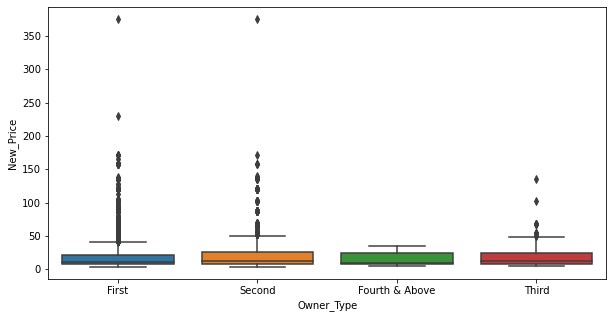

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="New_Price", data=cars)
plt.show()
plt.show()

### Observations
- Owner Type does nto appear to inform New_Price as much as the other categorical variables

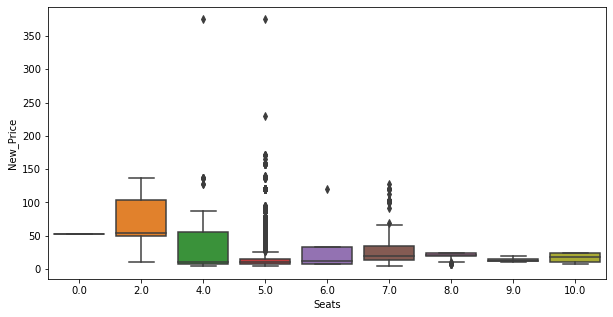

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Seats", y="New_Price", data=cars)
plt.show()
plt.show()

### Observations
- 84% of Cars have 5 seats, 11% of cars have 7 seats, slightly over 2% of cars have 8 seats and slightly under 2% of cars have 4 seats. The remaining categories of 0(?), 6 seats, 9 seats and 10 seats account for no more than 1% of Cars each.
- 5 seat cars have lower prices that 2 seat cars (most expensive (perhaps sports cars)), 4 seat cars and 7 seat cars. 
- 5 seat cars are less expensive in general than cars with other seat counts.

## EDA Summary

### Data Descriptions


### Data Cleaning


### Observations
